# BBC021: Human MCF7 cells – compound-profiling experiment

In [1]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [2]:
from aicsimageio.readers.tiff_glob_reader import TiffGlobReader
import re

In [3]:
data_dir = Path("/user/gent/420/vsc42015/vsc_data_vo/datasets/BBBC021")

In [4]:
def map_to_index(f):
    idx = re.match("^.*_w([0-9]).*$", f).group(1)
    m = {"1": 0, "2": 1, "4": 2}
    return pandas.Series(
        dict(S=0, T=0, C=m[idx], Z=0)
    )

im = TiffGlobReader(
    glob_in=sorted([str(p) for p in data_dir.glob("Week1_22123/Week1_150607_B02_s1_w*.tif")]),
    indexer=map_to_index,
    channel_names=["DAPI", "Tubulin", "Actin"]
)

In [5]:
im.get_image_data("CXY").shape

(3, 1280, 1024)

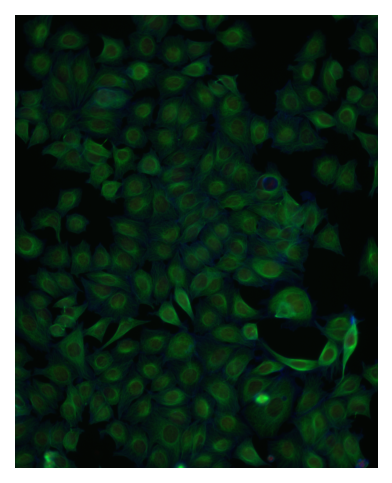

In [6]:
pixels = im.get_image_data("XYC")

fig, ax = plt.subplots(dpi=150)
ax.imshow(pixels / pixels.reshape(1, -1).max(axis=1))
ax.set_axis_off()